# 차원축소 Assignment2

## MNIST data에 적용을 해보기 (╹◡╹)

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

기본적으로 사용할 패키지들을 import하고 사용할 데이터를 불러와 전처리를 진행한다. 잊지 말아야할 점은 mnist-original.mat을 꼭!! 현재 쓰고 있는 노트북 파일과 같은 위치에 두어야 하다는 점이다...

In [64]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [65]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

In [22]:
# 데이터 정보!
# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

불러온 데이터는 7만개의 작은 숫자이미지로 feature는 784개가 있다. 좀 더 분석하기 편하게 이 데이터를 데이터 프레임으로 만들어준다.

In [66]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [67]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [69]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


간단하게 받아드린 데이터에 대해서 시각화를 진행했다.

<Figure size 432x288 with 0 Axes>

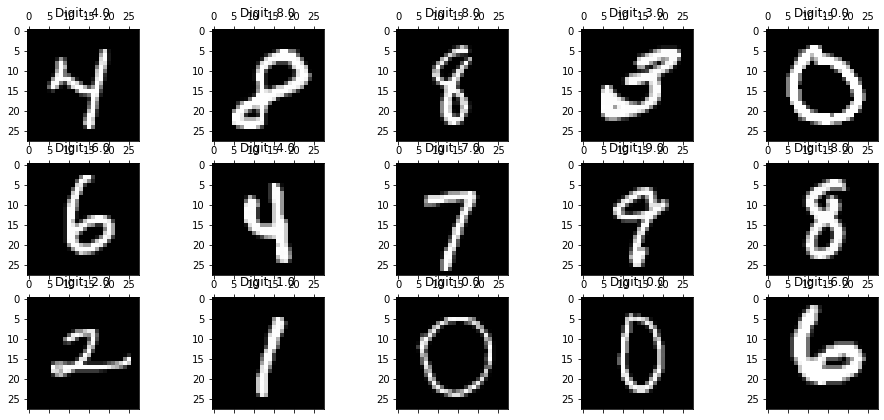

In [70]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000, 1), (14000, 1))

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!
강의에서 배웠던 3가지 중 어떤 걸 고려하였는지요! 
scree plot같은거는 직접 그려봐도 좋겠죠 ㅎㅎㅎ

해당 데이터는 feature가 너무 많다는 단점이 있다. feature가 너무 많을 경우, 차원이 너무 많아져서 연산량이 늘어나고 차원의 저주 등의 문제가 발생하므로 이를 막기 위해 차원 축소 기법을 적용해볼 생각이다.  

차원 축소 기법을 적용하기 전, scaler는 필수이다. 차원 축소에서 가장 중요한 것은 주성분이 해당 데이터를 얼마나 잘 설명하고, 새롭게 생길 축에 데이터들이 얼마나 가깝게 위치하냐이다. 즉, 거리가 가장 중요한 요소이다. 따라서 scaling과정은 필수불가결하다.  

위 데이터는 standardscaler를 사용했다. 과정은 아래와 같다.

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

LDA의 경우, 성분의 개수를 크게 염두에 두지 않아도 된다. label의 class가 몇 개인지를 파악하고 그 개수에서 -1 만큼만 해주면 된다. 앞서 전처리에서 10개의 class가 있다고 밝혔으므로 lda를 진행할 땐, components를 9로 설정해주면 된다.

그러나 PCA의 경우, 주성분의 개수를 고려해야한다. 주성분 개수를 결정짓는 방법은 크게 아래의 3가지다.  

    1. scree plot의 elbow point  
    2. Kaiser's rule  
    3. 누적 설명률이 70~80% 이상인 지점  
    
이 세 가지 방법을 사용하여 주성분을 결정하려고 한다.

우선 2번 Kaiser's rule을 사용한 것이다. eigenvalue가 1 이상의 주성분들을 찾으면 된다. 앞서 1번 과제에서 했던 방식으로 공분산 행렬을 구하고 이를 분해했다. 그리고 고유값 리스트를 eig_vals로 받고 이를 1이상이라는 조건으로 index함으로서 1이상의 고유값들을 찾아봤다.

In [ ]:
#http://machinelearningkorea.com/2019/06/21/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9Dpca-%EC%9D%B4%ED%95%B4%EC%9A%A9-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%BD%94%EB%93%9C/

In [74]:
cov = np.cov(X_train_std.T)

In [75]:
eig_vals, eig_vecs = np.linalg.eig(cov)
len(eig_vals[eig_vals >= 1])

164

총 164개의 주성분을 찾을 수 있었다.  

이제 3번 방법을 사용하려고 한다.우선 그래프로 개략적인 개수를 파악해보자. sklearn에서 제공하는 pca 함수를 이용하면 누적설명률을 구하기 쉽다. pca.explained_variance_ratio_ 함수를 사용해 각 주성분들의 설명률을 구한다. 그리고 cumsum함수를 통해 이를 누적해서 더해준다. 그리고 이를 그래프로 만들면 아래와 같은 그림이 만들어진다. (이 때, 설명률이란 (주성분 하나의 고유값) / (전체 고유값들의 합)이다.)

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [76]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative explained variance')

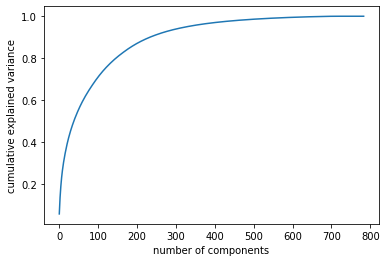

In [77]:
pca = PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

약 100개부터 150개 정도의 주성분이면 데이터의 70~80% 정도를 설명할 수 있는 것으로 파악된다. 좀 더 구체적인 숫자를 위해 아래와 같은 과정을 진행했다.

In [ ]:
#https://excelsior-cjh.tistory.com/167

In [78]:
pca1 = PCA(n_components = 0.8).fit(X_train_std)
pca1.n_components_

147

In [79]:
pca2 = PCA(n_components = 0.7).fit(X_train_std)
pca2.n_components_

97

pca함수를 사용할 때, n_components에 0부터 1사이의 값을 넣으면 해당 누적 설명률 만큼의 주성분을 사용하게 된다. 이후 n_components_ 코드를 사용하니 위에서 예측했던 것과 비슷한 수가 나옴을 알 수 있었다.

마지막 1번을 사용해보기로 하자. 과정은 아래와 같다. 역시 설명률을 사용하는 방법이다. 그리고 이 설명률을 바탕으로 scree plot을 만드는 것이다. 그래프는 아래와 같이 나왔다.

In [ ]:
eigvals = eig_vals**2/np.sum(eig_vals**2)

In [ ]:
#https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python

Text(0, 0.5, 'Eigenvalue')

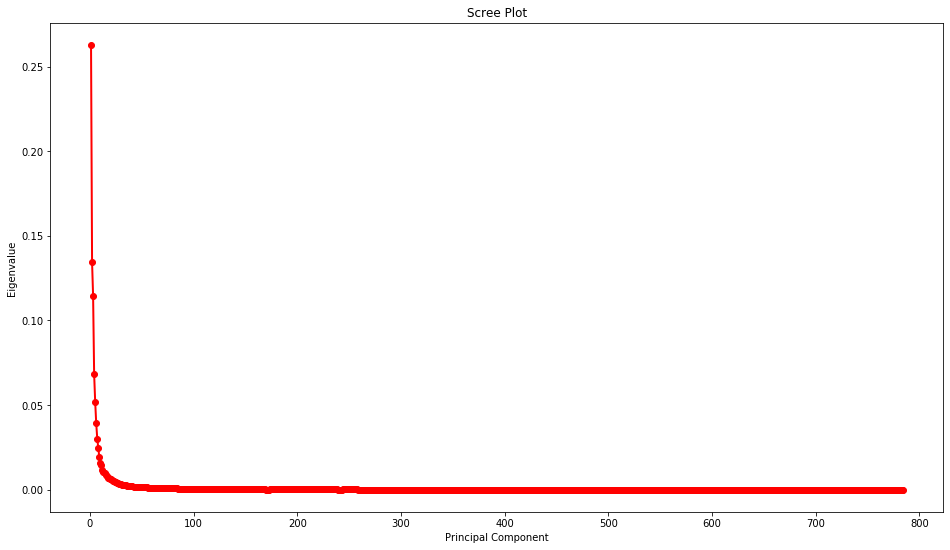

In [81]:
fig = plt.figure(figsize = (16,9))
sing_vals = np.arange(784) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

그래프가 너무 범위가 넓으므로 x의 범위를 조금 좁혀보기로 하자

(0, 40)

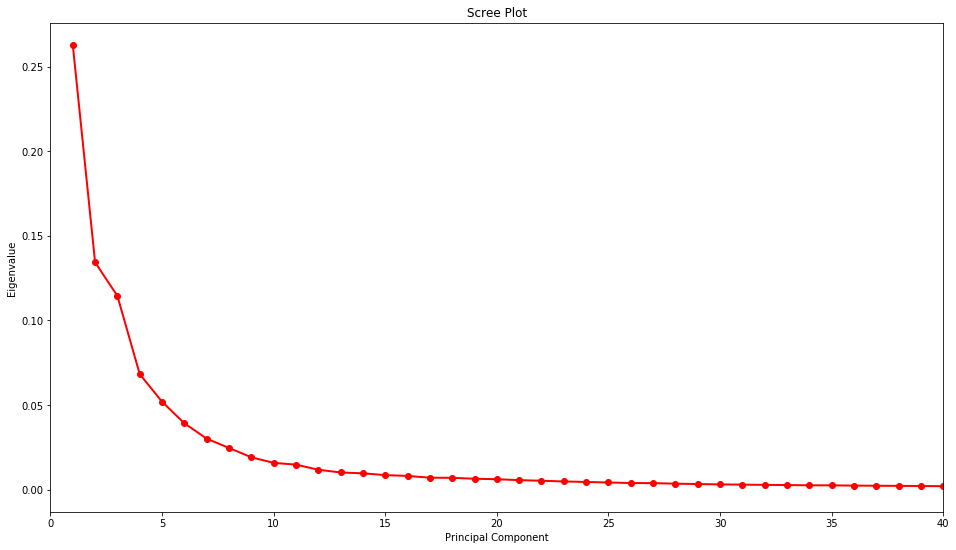

In [82]:
fig = plt.figure(figsize = (16,9))
sing_vals = np.arange(784) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xlim(0,40)

20까지로 좁혔을 땐, 곡선의 형태가 눈에 확 들어와서 조금 더 넓히기로 했다. 이 후 위와 같이 40까지 좁혔다. 실제 elbow point로 보이는 점은 5~10 정도로 보인다. 그러나 이는 너무 적은 수라고 판단했다. 하여 kaiser's rule까지 같이 고려했을 때 약 20개 정도의 주성분이면 괜찮을 것이라고 생각했다.

세 가지 방법을 모두 사용해봤다. 개인적으로 판단했을 때, 2번과 3번 방식이 믿을만 하다고 판단했다. 그 중에서도 3번 방법을 사용했다.  

그 이유은 1번의 경우, 주성분의 개수가 너무 적다고 판단했다. elbow point 및 kaiser's rule을 동시에 고려해도 너무 적었다. 그리고 2번의 경우, 주성분의 개수는 적당하다고 판단했다. 그러나 자료수집 결과, 1이상의 주성분이라고 해서 무조건적으로 주성분에 포함되야 하는 것은 아니라는 자료를 봤다. 이에 160개보다 아래라고 추측하고 3번을 진행했다.  

3번에서 누적 설명률이 70%일 땐 주성분이 97개, 누적 설명률이 80%일 땐 주성분이 147개 임이 확인됐다. 이를 약 100개와 150개로 생각하고 그 중간값을 구했을 때, 125개 정도라고 생각했다. 따라서 pca를 진행할 때, 125개의 주성분을 바탕으로 진행하기로 했다.

In [83]:
pca = PCA(n_components = 125)
pca_X_train = pca.fit_transform(X_train_std)
pca_X_test = pca.transform(X_test_std)

위와 같이 pca과정을 진행했고, pca_train 데이터와 pca_test 데이터를 만들었다.

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
lda = LinearDiscriminantAnalysis(n_components = 9)
lda.fit(X_train_std,y_train)
lda_X_train = lda.transform(X_train)
lda_X_test = lda.transform(X_test)

LDA의 경우, 앞서 말했듯이 9개의 components를 바탕으로 차원 축소를 진행했다. 이를 통해 lda_train, lda_test 데이터를 만들었다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

원본 데이터, pca 데이터, lda 데이터를 바탕으로 머신러닝 기법을 적용해보기로 하자. 지금부터 분석에 진행할 모델은 SVM, Random Forest, Logistic Regression 모델 세 가지로 선정했다. 우선 SVM부터 진행하자

## SVM

본격적인 분석에 앞서 과제에 요구되는 것은 크게 2가지이다. 하나는 accuracy이고 나머지는 time이다. 하여 training time을 비교하기 위해 time.time()이라는 코드를 사용하자. 자세한 예시는 아래의 링크에 있다.

In [ ]:
#https://nuggy875.tistory.com/12

In [87]:
from sklearn.svm import SVC
import time

### original

In [102]:
start_time = time.time()
svm1 = SVC()
svm1.fit(X_train,y_train)
end_time = time.time() - start_time
print(end_time)

545.44508934021


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

predict = svm1.predict(X_test)
accuracy_score(y_test, predict)

0.9795714285714285

우선 원본 데이터를 바탕으로 학습시켰을 때, 시간은 약 10분 정도 걸리고, 정확도는 0.98 정도가 나왔다. 연산 시간은 굉장히 오래 걸렸으나 정확도는 상당함을 알 수 있다.

### PCA

In [100]:
start_time = time.time()
svm2 = SVC()
svm2.fit(pca_X_train,y_train)
end_time = time.time() - start_time
print(end_time)

149.0278034210205


In [101]:
svm_pca_predict = svm2.predict(pca_X_test)
accuracy_score(y_test, svm_pca_predict)

0.9707142857142858

pca 데이터를 사용했을 때, 확실히 원본 데이터에 비해 학습속도가 줄어든 것을 알 수 있었다. 약 2분 30초 가량 소모됐다. 확연히 학습 속도가 줄었으나 정확도는 크게 줄지 않았음을 파악할 수 있었다.

### LDA

In [98]:
start_time = time.time()
svm3 = SVC()
svm3.fit(lda_X_train,y_train)
end_time = time.time() - start_time
print(end_time)

20.328779458999634


In [99]:
svm_lda_predict = svm3.predict(lda_X_test)
accuracy_score(y_test, svm_lda_predict)

0.9194285714285715

앞의 두 분석에 비해 더 많이 시간이 줄었음을 알 수 있었다. 또한 accuracy 역시 상당히 높으나 앞의 두 svm 모델에 비해선 성능이 떨어진 것을 알 수 있다.

## SVM_GridSearch

더 높은 accuracy를 얻기 위해 gridsearch를 진행했다.

### original

In [104]:
param_grid_svm = {'C':[0.01,0.1,1,10,100]}
grid_svm1 = GridSearchCV(svm1, param_grid_svm, cv=3, scoring='accuracy',n_jobs = -1)
grid_svm1.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [105]:
print("Best Parameter: {}".format(grid_svm1.best_params_))
print("Test set Score: {:.3f}".format(grid_svm1.score(X_test, y_test)))

Best Parameter: {'C': 10}
Test set Score: 0.985


위와 같이 gridsearch를 진행한 결과, c가 10일 때 0.985라는 accuracy를 얻을 수 있었다. 확실히 gridsearch를 하지 않은 모델보다 더 높은 accuracy를 얻을 수 있었다. 그러나 시간이 굉장히 오래 걸렸다...

### PCA

In [106]:
grid_svm2 = GridSearchCV(svm2, param_grid_svm, cv=3, scoring='accuracy',n_jobs = -1)
grid_svm2.fit(pca_X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [107]:
print("Best Parameter: {}".format(grid_svm2.best_params_))
print("Test set Score: {:.3f}".format(grid_svm2.score(pca_X_test, y_test)))

Best Parameter: {'C': 100}
Test set Score: 0.977


pca 데이터를 학습한 모델을 Gridsearch한 경우, accuracy는 0.977까지 상승한 것으로 나타났다. 

### LDA

In [108]:
grid_svm3 = GridSearchCV(svm3, param_grid_svm, cv=3, scoring='accuracy',n_jobs = -1)
grid_svm3.fit(lda_X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [109]:
print("Best Parameter: {}".format(grid_svm3.best_params_))
print("Test set Score: {:.3f}".format(grid_svm3.score(lda_X_test, y_test)))

Best Parameter: {'C': 10}
Test set Score: 0.923


lda 데이터를 학습한 모델의 gridsearch의 경우, 위와 같이 나왔고, accuracy는 소폭 상승한 것으로 보인다.  

확실히 처음 원본 데이터가 가장 높은 accuracy를 가졌고, 그 다음이 pca, lda 순으로 높은 accuracy를 보였다.

## Random Forest

### original

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
start_time = time.time()
rf1 = RandomForestRegressor()
rf1.fit(X_train,y_train)
end_time = time.time() - start_time
print(end_time)

1564.2841801643372


In [114]:
rf_predict = rf1.predict(X_test)
rf1.score(X_test,y_test)

0.8947625569026472

random forest의 accuracy는 0.89476 정도가 나왔다. 확실히 svm에 피해서 많이 떨어졌음을 확인했다. 또한 svm에 비해서 시간이 엄청 걸림을 확인할 수 있었다. 약 25분 정도 소요된 것으로 확인된다.(svm때와 같이 accuracy_score 코드를 사용했지만 error가 발생했다. 그래서 accuracy를 구하는 함수를 사용해 accuracy를 구했다.)

### PCA

In [117]:
start_time = time.time()
rf2 = RandomForestRegressor()
rf2.fit(pca_X_train,y_train)
end_time = time.time() - start_time
print(end_time)

1026.628636598587


In [120]:
rf_pca_predict = rf2.predict(pca_X_test)
rf2.score(pca_X_test,y_test)

0.8698696400152328

pca 데이터를 학습한 random forest 모델의 경우, 확실히 학습시간이 줄어든 것을 확인할 수 있었다. 약 10분 가량이 줄어들었다. 그러나 그에 비해 모델의 accuracy는 소폭 하강한 것을 알 수 있었다.

### LDA

In [121]:
start_time = time.time()
rf3 = RandomForestRegressor()
rf3.fit(lda_X_train,y_train)
end_time = time.time() - start_time
print(end_time)

86.45494556427002


In [122]:
rf_lda_predict = rf3.predict(lda_X_test)
rf3.score(lda_X_test,y_test)

0.8551104189566844

lda의 경우, 확실히 요소의 수가 적어서 그런지 시간이 위의 두 random forest 모델에 비해 엄청 줄어들었음을 확인할 수 있었다. 위의 두 모델이 15분 이상의 시간을 들여 학습한 것에 비해 lda는 약 2분도 채 안되는 시간에 학습을 마쳤다. 시간을 엄청 줄인 것에 비해, accuracy가 두 모델에 비해 뒤떨어지지 않는 것이 인상깊다.  

실제 연구에서 이런 상황이 벌어진다면, LDA 데이터를 사용하는 것이 합리적이라고 생각된다.

Random Forest 모델의 경우, 굳이 gridsearch를 진행하진 않는다. 이 과제의 최종 목적은 accuracy를 최대로 높이는 것이다. 이미 svm에서 많이 올렸고, 위의 random forest에서 gridsearch를 진행하여도, svm 모델들에 비해 현저히 좋아질 것이라고 예측되진 않기 때문이다. 뿐만 아니라 연산에 걸리는 시간도 너무 길 것으로 예측되어 뺐다.

## Logistic Regression

### Original

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
start_time = time.time()
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
end_time = time.time() - start_time
print(end_time)

20.131065368652344


In [125]:
lr_predict = lr1.predict(X_test)
accuracy_score(y_test, lr_predict)

0.9183571428571429

마지막으로 logistic regression 모델을 진행한다. 앞의 두 모델들에 비해 확실히 엄청 빠른 학습시간을 보여준다. 게다가 모델의 accuracy 역시 그렇게 나빠 보이지 않는다.

### PCA

In [126]:
start_time = time.time()
lr2 = LogisticRegression()
lr2.fit(pca_X_train,y_train)
end_time = time.time() - start_time
print(end_time)

7.543823003768921


In [127]:
lr_pca_predict = lr2.predict(pca_X_test)
accuracy_score(y_test, lr_pca_predict)

0.9192142857142858

pca 데이터를 바탕으로 모델을 학습시키면 역시 학습 시간이 줄어듦을 알 수 있었다. 하지만 이 정도 시간은 이전의 모델들에서는 찾을 수 없었던 학습시간일 뿐만 아니라 오히려 pca를 통해 accuracy가 미약하게 상승했음을 알 수 있다. pca의 경우, logistic과 만났을 때, 가장 시너지를 발생한다고 조심스럽게 추측해본다.

### LDA

In [128]:
start_time = time.time()
lr3 = LogisticRegression()
lr3.fit(lda_X_train,y_train)
end_time = time.time() - start_time
print(end_time)

6.0847272872924805


In [129]:
lr_lda_predict = lr3.predict(lda_X_test)
accuracy_score(y_test, lr_lda_predict)

0.8849285714285714

lda 데이터를 바탕으로 모델을 학습시키면 pca 모델보다 더 학습시간이 줄어듦을 발견했다. 지금까지의 모델 중 가장 짧은 시간에 학습했다는 것을 알 수 있다. 그러나 동시에 accuracy는 줄어들었다는 것을 확인했다. 확실히 차원이 줄어들면서 정보가 소실되기 때문이라고 생각한다.

## Logistic Regression_GridSearch

### Original

In [132]:
param_grid_lr = {'C':[0.01,0.1,1,10,100]}

grid_lr1 = GridSearchCV(lr1, param_grid_lr, cv=3, n_jobs = -1)
grid_lr1.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [133]:
print("Best Parameter: {}".format(grid_lr1.best_params_))
print("Test set Score: {:.3f}".format(grid_lr1.score(X_test, y_test)))

Best Parameter: {'C': 0.1}
Test set Score: 0.918


gridsearch를 진행했음에도 불구하고 accuracy가 크게 변함이 없음을 확인했다.

### PCA

In [134]:
grid_lr2 = GridSearchCV(lr2, param_grid_lr, cv=3, n_jobs = -1)
grid_lr2.fit(pca_X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [135]:
print("Best Parameter: {}".format(grid_lr2.best_params_))
print("Test set Score: {:.3f}".format(grid_lr2.score(pca_X_test, y_test)))

Best Parameter: {'C': 1}
Test set Score: 0.919


pca 데이터를 학습한 모델 역시 accuracy에 큰 변화가 있어보이진 않는다.

### LDA

In [136]:
grid_lr3 = GridSearchCV(lr3, param_grid_lr, cv=3, n_jobs = -1)
grid_lr3.fit(lda_X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [137]:
print("Best Parameter: {}".format(grid_lr3.best_params_))
print("Test set Score: {:.3f}".format(grid_lr3.score(lda_X_test, y_test)))

Best Parameter: {'C': 100}
Test set Score: 0.885


lda 역시 accuracy의 큰 변화가 있지는 않는다.  

이를 바탕으로 생각했을 때, logistic regressiond은 pca를 진행했을 때, accuracy가 소폭 상승하지만 이를 바탕으로 gridsearch를 진행했을 때는 큰 변화가 없다라고 조심스럽게 추측해본다.

## 결론

결국 세 모델 중 가장 높은 accuracy를 갖는 모델은 SVM모델인 것으로 확인했다. 그리고 원본데이터, PCA데이터, LDA데이터를 바탕으로 학습시킨 svm모델 중 가장 accuracy가 큰 것은 원본 데이터였다. gridsearch를 통해 얻은 accuracy 최대값은 0.985였다.  

모든 모델에서 보이는 공통점은 원본 데이터일 때, 대체로 accuracy가 가장 높다는 것이다.(logistic 제외) 그러나 이는 학습에 시간을 너무 많이 소비한다. pca나 lda를 통해 accuracy는 소폭 줄이되, 학습시간을 줄이는 것도 하나의 좋은 방법이라고 생각한다.